In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

import numpy as np

# read spec data
z = 0.0307
spec = '../../spectroscopy/ZTF20aayhacx_20200609_GNIRS.ascii'
Spec1 = SpectrumSN_Lines(spec, z)

# 20200609_GNIRS

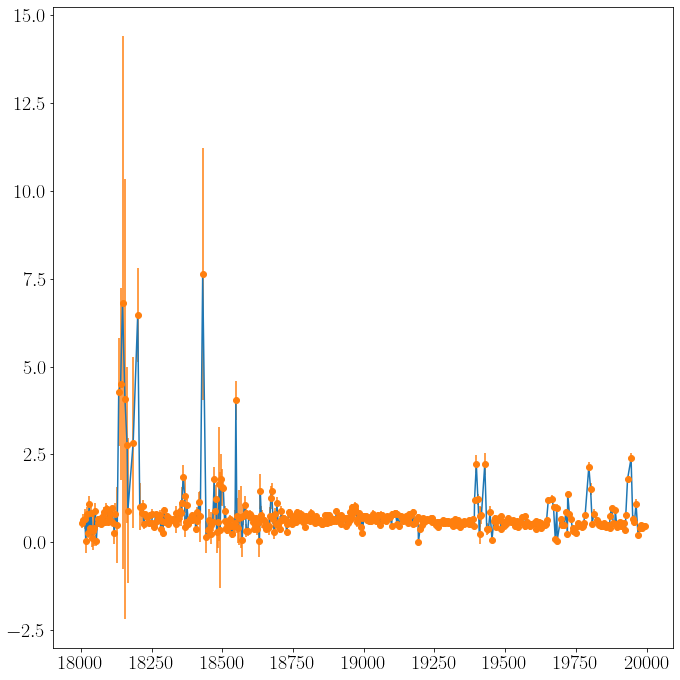

In [8]:
Spec1.plot_line_region(18000, 20000)

## Ca II IRT

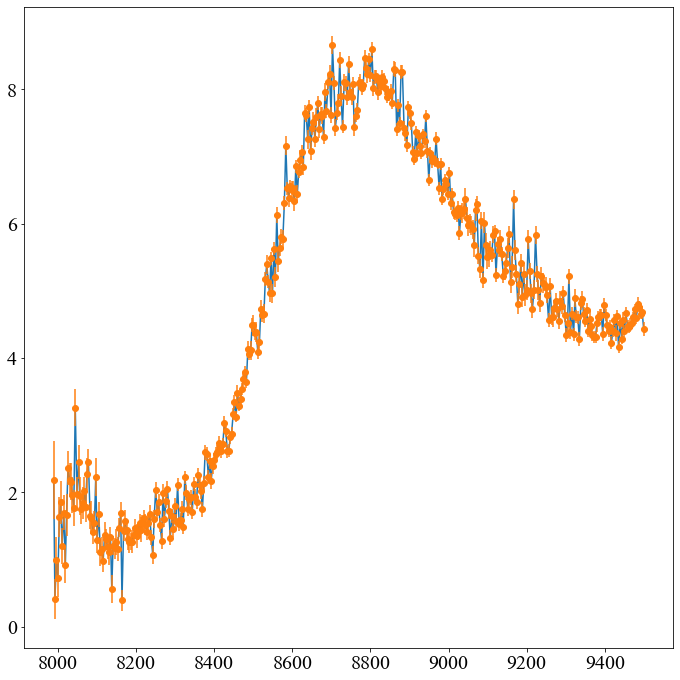

In [4]:
Spec1.plot_line_region(7400, 9500)

## He I 10830

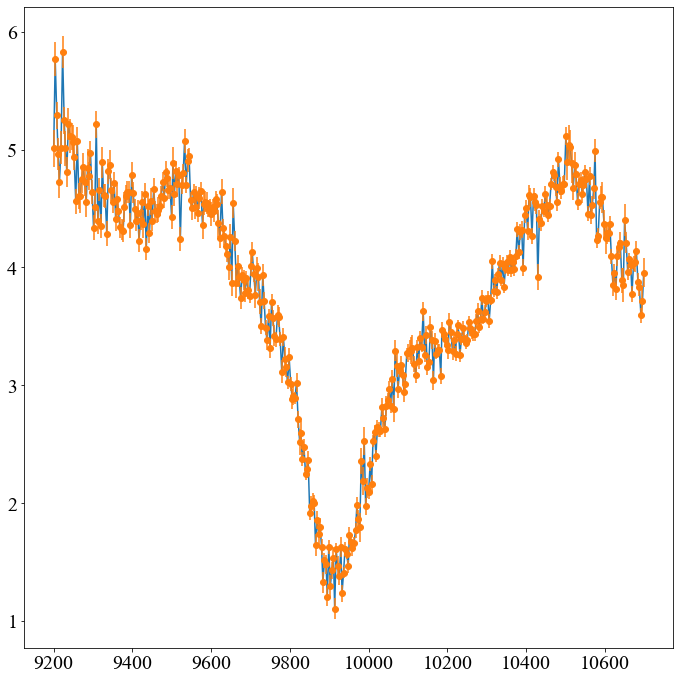

In [5]:
Spec1.plot_line_region(9200, 10700)

In [6]:
Spec1.add_line('HeI_10830', 9500, 10500, lines=[10830])

267 points within 9500.00 and 10500.00 angstroms.


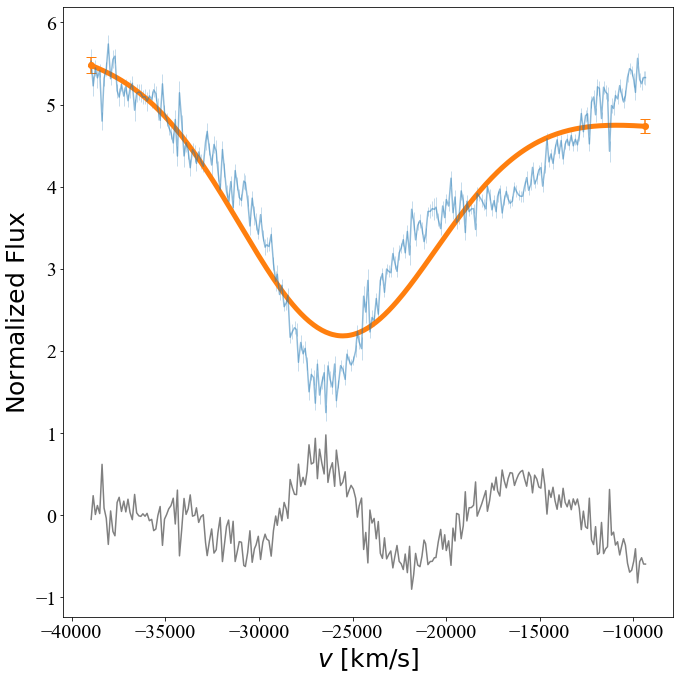

LS estimation:
Velocity pvf: -25776 km/s


In [7]:
Spec1.line['HeI_10830'].LS_estimator(guess=(1, 1, -25000, 15, -2000))

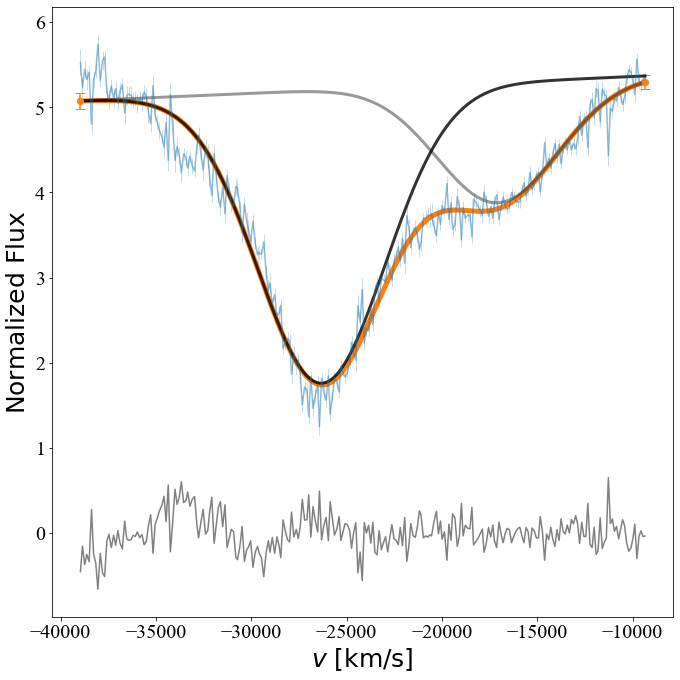

LS estimation:
Velocity pvf: -26303 km/s
Velocity hvf: -17073 km/s


In [10]:
Spec1.line['HeI_10830'].LS_estimator(guess=(1, 1, -25000, 15, -2000, -15000, 15, -2000))

In [11]:
vel.velocity_rf_line(10830, 10927, Spec1.line['HeI_10830'].theta_LS[-3])

-19736.023718631615

In [12]:
vel.velocity_rf_line(10830, 10693, Spec1.line['HeI_10830'].theta_LS[-6])

-22512.044642400888

## Mg II 10927

In [6]:
Spec1.add_line('MgII_10927', 9500, 10500, lines=[10927])

267 points within 9500.00 and 10500.00 angstroms.


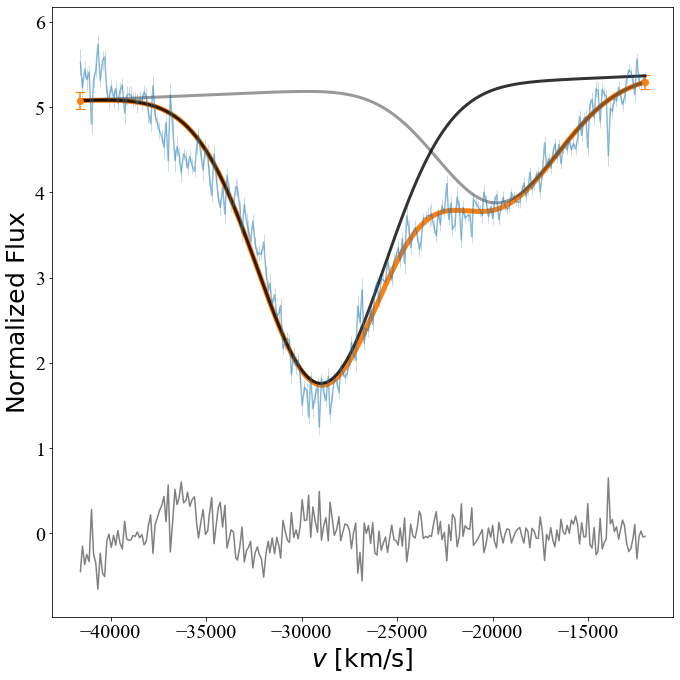

LS estimation:
Velocity pvf: -28958 km/s
Velocity hvf: -19740 km/s


In [9]:
Spec1.line['MgII_10927'].LS_estimator(guess=(1, 1, -30000, 15, -2000, -25000, 15, -2000))

# Compare Lines

In [3]:
import matplotlib.pyplot as plt

In [4]:
spec_Lick = '../../spectroscopy/ZTF20aayhacx_20200529_Lick_3-m_v1.ascii'

In [5]:
Spec1_Lick = SpectrumSN_Lines(spec_Lick, z)
Spec1_Lick.add_line('CaII_IRT', 7250, 8900, lines=[8498.018, 8542.089, 8662.140])

850 points within 7250.00 and 8900.00 angstroms.


In [6]:
Spec1 = SpectrumSN_Lines(spec, z)
Spec1.add_line('HeI_10830', 9530, 10830, lines=[10830])
Spec1.add_line('HeI_20581', 18081, 20581, lines=[20581])

347 points within 9530.00 and 10830.00 angstroms.
548 points within 18081.00 and 20581.00 angstroms.


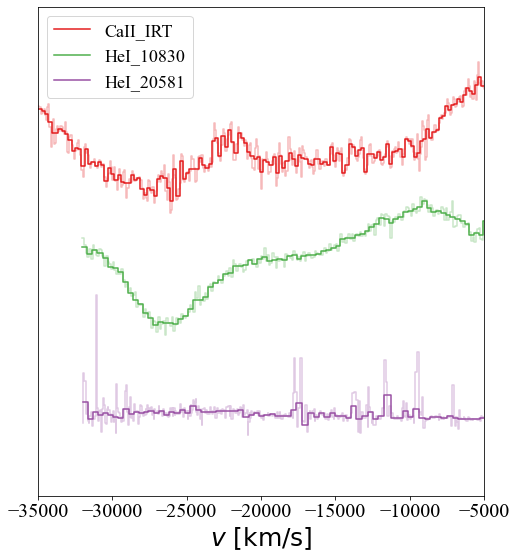

In [17]:
plt.figure(figsize=(8, 3 * 3))
ax = plt.gca()
Spec1_Lick.compare_lines(ax, vmax=-35000, vmin=-5000, norm_fac=0.2, bin_size=200)
Spec1.compare_lines(ax, vmax=-32000, vmin=-5000, displace=2, bin_size=300)
plt.ylim(-8, 8)
plt.legend(prop={'size': 18})
plt.xlim(-35000, -5000)
plt.show()

In [8]:
Spec2 = SpectrumSN_Lines(spec, z)
Spec2.add_line('MgII_9227', 9227 - 1200, 9227, lines=[9227])
Spec2.add_line('MgII_10927', 10927 - 1500, 10927, lines=[10927])

321 points within 8027.00 and 9227.00 angstroms.
401 points within 9427.00 and 10927.00 angstroms.


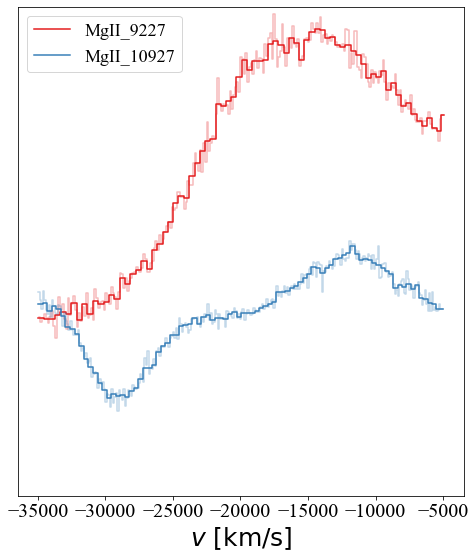

In [16]:
plt.figure(figsize=(8, 3 * 3))
ax = plt.gca()
Spec2.compare_lines(ax, vmax=-35000, vmin=-5000, bin_size=300)
plt.ylim(-3, 10)
plt.legend(prop={'size': 18})
plt.show()